# Player Analysis

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploration

In [230]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [231]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [232]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [233]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


### Replacing DD with DC

In [234]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

## Taking in Consideration only DC VS KXIP matches

In [235]:
KXIP_DC=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Kings XI Punjab'))]

KXIP_DC.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
3318,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
3319,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
3320,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,4,0,4,NaN,NaN
3321,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN
3322,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,Sandeep Sharma,0,0,0,0,0,0,0,NaN,NaN


In [236]:
KXIP_DC.match_id.nunique()

24

## KL Rahul's strike rate in first 6 overs

In [58]:
rahul = KXIP_DC[(KXIP_DC["batting_team"]=="Kings XI Punjab") & (KXIP_DC["batsman"]=="KL Rahul")]
rahul = rahul[rahul["over"]<=6]
rahul = rahul[rahul["wide_runs"]==0]


rahul.iloc[30:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
155428,Delhi Capitals,field,Kings XI Punjab,1,Kings XI Punjab,Delhi Capitals,5,3,KL Rahul,MA Agarwal,L Plunkett,0,0,0,0,0,0,0,KL Rahul,caught
167689,Delhi Capitals,field,Kings XI Punjab,1,Kings XI Punjab,Delhi Capitals,1,1,KL Rahul,S Curran,K Rabada,0,0,0,0,0,0,0,NaN,NaN
167690,Delhi Capitals,field,Kings XI Punjab,1,Kings XI Punjab,Delhi Capitals,1,2,KL Rahul,S Curran,K Rabada,0,0,0,0,0,0,0,NaN,NaN
167691,Delhi Capitals,field,Kings XI Punjab,1,Kings XI Punjab,Delhi Capitals,1,3,KL Rahul,S Curran,K Rabada,0,0,0,0,4,0,4,NaN,NaN
167692,Delhi Capitals,field,Kings XI Punjab,1,Kings XI Punjab,Delhi Capitals,1,4,KL Rahul,S Curran,K Rabada,0,0,0,0,0,0,0,NaN,NaN


In [59]:
rahul.over.unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [60]:
rahul.season.unique()

array([2018, 2019], dtype=int64)

In [61]:
rahul.match_id.unique()

array([ 7895,  7915, 11149, 11328], dtype=int64)

In [67]:
strike =rahul.groupby(["season",'match_id','batsman']).agg({"batsman_runs":"sum","ball":"count"})

print("Runs scored by KL Rahul against DC :")

strike

Runs scored by KL Rahul against DC :


batsman_runs  ball
season match_id batsman                     
2018   7895     KL Rahul            51    16
       7915     KL Rahul            23    15
2019   11149    KL Rahul            15    11
       11328    KL Rahul            12     9

In [72]:
strike_rate = pd.DataFrame((strike['batsman_runs']/strike["ball"]) * 100)

strike_rate.columns = ["strike rate"]

print("Strike Rate of KL Rahul while batting against DC :")

strike_rate

Strike Rate of KL Rahul while batting against DC :


strike rate
season match_id batsman              
2018   7895     KL Rahul   318.750000
       7915     KL Rahul   153.333333
2019   11149    KL Rahul   136.363636
       11328    KL Rahul   133.333333

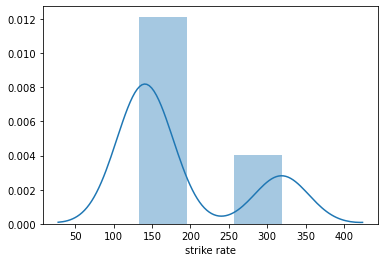

In [74]:
sns.distplot(strike_rate["strike rate"])

In [76]:
print("Average strike rate of Rahul against DC :",round(strike_rate['strike rate'].mean()))

Average strike rate of Rahul against DC : 185


- Overall

In [77]:
rahul_overall = matches[(matches["batting_team"]=="Kings XI Punjab") & (matches["batsman"]=="KL Rahul")]
rahul_overall = rahul_overall[rahul_overall["over"]<=6]
rahul_overall = rahul_overall[rahul_overall["wide_runs"]==0]


rahul_overall.iloc[30:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
153026,Chennai Super Kings,field,Kings XI Punjab,1,Kings XI Punjab,Chennai Super Kings,1,1,KL Rahul,CH Gayle,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
153027,Chennai Super Kings,field,Kings XI Punjab,1,Kings XI Punjab,Chennai Super Kings,1,2,KL Rahul,CH Gayle,DL Chahar,0,0,0,0,4,0,4,NaN,NaN
153028,Chennai Super Kings,field,Kings XI Punjab,1,Kings XI Punjab,Chennai Super Kings,1,3,KL Rahul,CH Gayle,DL Chahar,0,0,0,0,2,0,2,NaN,NaN
153029,Chennai Super Kings,field,Kings XI Punjab,1,Kings XI Punjab,Chennai Super Kings,1,4,KL Rahul,CH Gayle,DL Chahar,0,0,0,0,0,0,0,NaN,NaN
153030,Chennai Super Kings,field,Kings XI Punjab,1,Kings XI Punjab,Chennai Super Kings,1,5,KL Rahul,CH Gayle,DL Chahar,0,0,0,0,0,0,0,NaN,NaN


In [107]:
rahul_overall.match_id.nunique()

28

In [102]:
rahul_overall.over.unique()

array([1, 2, 3, 5, 6, 4], dtype=int64)

In [85]:
strike_overall =rahul_overall.groupby(["season",'match_id','batsman']).agg({"batsman_runs":"sum","ball":"count"})

print("Runs scored by KL Rahul :")

strike_overall

Runs scored by KL Rahul :


batsman_runs  ball
season match_id batsman                     
2018   7895     KL Rahul            51    16
       7901     KL Rahul            25    14
       7905     KL Rahul            28    15
       7909     KL Rahul            16    17
       7911     KL Rahul            37    14
       7915     KL Rahul            23    15
       7918     KL Rahul            29    21
       7927     KL Rahul            20    17
       7931     KL Rahul            18    15
       7933     KL Rahul            27    25
       7937     KL Rahul            36    18
       7941     KL Rahul            22    15
       7943     KL Rahul            27    18
       7949     KL Rahul             7    11
2019   11140    KL Rahul             4     4
       11142    KL Rahul             1     5
       11145    KL Rahul            10    16
       11149    KL Rahul            15    11
       11309    KL Rahul            26    16
       11313    KL Rahul             9    12
       11315    KL Rahul            24    21
       11319    KL Rahul            12    13
       11323    KL Rahul             4    13
       11328    KL Rahul            12     9
       11333    KL Rahul            32    18
       11339    KL Rahul            26    24
       11343    KL Rahul             2     7
       11346    KL Rahul            59    23

In [91]:
strike_rate_overall = pd.DataFrame((strike_overall['batsman_runs']/strike_overall["ball"]) * 100)

strike_rate_overall.columns = ["strike rate"]

print("Strike Rate of KL Rahul (overall) :")

strike_rate_overall

Strike Rate of KL Rahul (overall) :


strike rate
season match_id batsman              
2018   7895     KL Rahul   318.750000
       7901     KL Rahul   178.571429
       7905     KL Rahul   186.666667
       7909     KL Rahul    94.117647
       7911     KL Rahul   264.285714
       7915     KL Rahul   153.333333
       7918     KL Rahul   138.095238
       7927     KL Rahul   117.647059
       7931     KL Rahul   120.000000
       7933     KL Rahul   108.000000
       7937     KL Rahul   200.000000
       7941     KL Rahul   146.666667
       7943     KL Rahul   150.000000
       7949     KL Rahul    63.636364
2019   11140    KL Rahul   100.000000
       11142    KL Rahul    20.000000
       11145    KL Rahul    62.500000
       11149    KL Rahul   136.363636
       11309    KL Rahul   162.500000
       11313    KL Rahul    75.000000
       11315    KL Rahul   114.285714
       11319    KL Rahul    92.307692
       11323    KL Rahul    30.769231
       11328    KL Rahul   133.333333
       11333    KL Rahul   177.777778
       11339    KL Rahul   108.333333
       11343    KL Rahul    28.571429
       11346    KL Rahul   256.521739

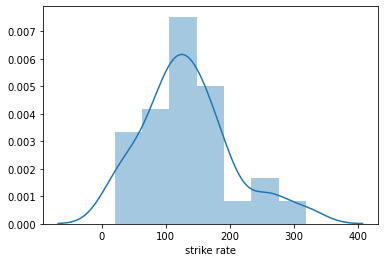

In [93]:
sns.distplot(strike_rate_overall["strike rate"])

In [94]:
print("Average strike rate of Rahul :",round(strike_rate_overall['strike rate'].mean()))

Average strike rate of Rahul : 134


## Confidence Interval

In [98]:
strike_rate_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
strike rate,28.0,133.501214,70.383464,20.0,93.665158,126.666667,166.319444,318.75


In [97]:
mean = strike_rate_overall['strike rate'].mean()
sd = strike_rate_overall['strike rate'].std()
n = len(strike_rate_overall['strike rate'])

n

28

In [99]:
tstar = 2.064
se = sd/np.sqrt(n)
se

13.30122450649345

In [100]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the strike rate with which Rahul is expected to score today  :{}".format((lcb, ucb)))

95% Confidence Interval for the strike rate with which Rahul is expected to score today  :(106.0, 161.0)


## Iyer 's contribuion to DC's total score

- Against KXIP

In [291]:
Delhi = KXIP_DC[KXIP_DC["batting_team"]=='Delhi Capitals']

In [293]:
total_runs =pd.DataFrame(Delhi.groupby(["match_id"])["total_runs"].sum())

total_runs.reset_index(level=0, inplace=True)

total_runs

,match_id,total_runs
0,15,188
1,35,67
2,73,158
3,100,118
4,120,58
5,161,120
6,177,146
7,218,111
8,259,231
9,293,141


In [294]:
iyer = Delhi[Delhi["batsman"]=="SS Iyer"]
iyer = iyer[iyer["wide_runs"]==0]

In [579]:
iyer_score = pd.DataFrame(iyer.groupby(["match_id"])["batsman_runs"].sum())

iyer_score.columns = ["Iyer's runs"]

iyer_score.reset_index(level=0, inplace=True)

iyer_score

,match_id,Iyer's runs
0,15,22
1,35,6
2,528,6
3,548,54
4,583,3
5,7895,11
6,7915,57
7,11149,28
8,11328,60


In [581]:
final = pd.merge(iyer_score, total_runs, on='match_id', how='inner')

final

,match_id,Iyer's runs,total_runs
0,15,22,188
1,35,6,67
2,528,6,169
3,548,54,119
4,583,3,113
5,7895,11,172
6,7915,57,148
7,11149,28,163
8,11328,60,177


In [582]:
final["contribution"] = round((final["Iyer's runs"]/final["total_runs"]) * 100)

final

,match_id,Iyer's runs,total_runs,contribution
0,15,22,188,12.0
1,35,6,67,9.0
2,528,6,169,4.0
3,548,54,119,45.0
4,583,3,113,3.0
5,7895,11,172,6.0
6,7915,57,148,39.0
7,11149,28,163,17.0
8,11328,60,177,34.0


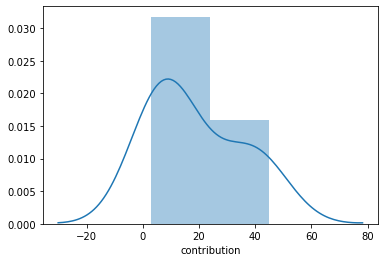

In [583]:
sns.distplot(final["contribution"])

In [584]:
print("Average contribution of Iyer in DC's inning against KXIP :{}%".format(round(final["contribution"].mean())))

Average contribution of Iyer in DC's inning against KXIP :19%


- Overall

In [585]:
Delhi_overall = matches[matches["batting_team"]=='Delhi Capitals']

In [586]:
cond1 = Delhi_overall["season"] == 2018
cond2 = Delhi_overall["season"] == 2019
recent_overall = Delhi_overall[cond1 | cond2]
recent_overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
150706,7895,2018,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Delhi Capitals,Kings XI Punjab,...,R Ashwin,0,0,0,0,1,0,1,NaN,NaN
150707,7895,2018,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Delhi Capitals,Kings XI Punjab,...,R Ashwin,0,0,0,0,2,0,2,NaN,NaN
150708,7895,2018,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Delhi Capitals,Kings XI Punjab,...,R Ashwin,0,0,0,0,1,0,1,NaN,NaN
150709,7895,2018,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Delhi Capitals,Kings XI Punjab,...,R Ashwin,0,0,0,0,0,0,0,NaN,NaN
150710,7895,2018,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Delhi Capitals,Kings XI Punjab,...,R Ashwin,0,0,0,0,1,0,1,NaN,NaN


In [587]:
total_runs12 =pd.DataFrame(recent_overall.groupby(["match_id"])["total_runs"].sum())

total_runs12.reset_index(level=0, inplace=True)

total_runs12

,match_id,total_runs
0,7895,172
1,7899,63
2,7902,197
3,7906,136
4,7912,186
5,7915,148
6,7919,223
7,7923,206
8,7925,203
9,7929,166


In [588]:
iyer_overall = recent_overall[recent_overall["batsman"]=="SS Iyer"]
iyer_overall = iyer_overall[iyer_overall["wide_runs"]==0]

In [589]:
iyer_score_overall = pd.DataFrame(iyer_overall.groupby(["match_id"])["batsman_runs"].sum())

iyer_score_overall.columns = ["Iyer's runs"]

iyer_score_overall.reset_index(level=0, inplace=True)

iyer_score_overall

,match_id,Iyer's runs
0,7895,11
1,7902,27
2,7906,4
3,7912,52
4,7915,57
5,7919,95
6,7923,13
7,7925,50
8,7929,44
9,7935,3


In [590]:
final_overall = pd.merge(total_runs12,iyer_score_overall , on='match_id', how='inner')

final_overall

,match_id,total_runs,Iyer's runs
0,7895,172,11
1,7902,197,27
2,7906,136,4
3,7912,186,52
4,7915,148,57
5,7919,223,95
6,7923,206,13
7,7925,203,50
8,7929,166,44
9,7935,190,3


In [591]:
final_overall["contribution"] = round((final_overall["Iyer's runs"]/final_overall["total_runs"]) * 100)

final_overall

,match_id,total_runs,Iyer's runs,contribution
0,7895,172,11,6.0
1,7902,197,27,14.0
2,7906,136,4,3.0
3,7912,186,52,28.0
4,7915,148,57,39.0
5,7919,223,95,43.0
6,7923,206,13,6.0
7,7925,203,50,25.0
8,7929,166,44,27.0
9,7935,190,3,2.0


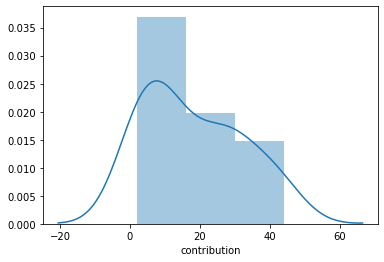

In [592]:
sns.distplot(final_overall["contribution"])

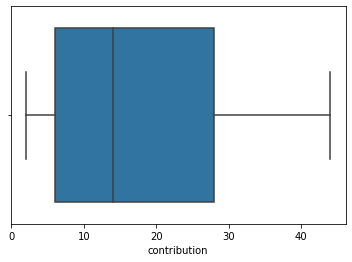

In [593]:
sns.boxplot(final_overall["contribution"])

In [594]:
print("Average contribution of Iyer in DC's inning overall in recent years :{}%".format(round(final_overall["contribution"].mean())))

Average contribution of Iyer in DC's inning overall in recent years :18%


## wickets KXIP will take excluding Shami's wicket

In [405]:
punjab = KXIP_DC[KXIP_DC["bowling_team"]=="Kings XI Punjab"]
punjab = punjab[(punjab["over"]>5) & (punjab["over"]<=20)]
punjab = punjab[punjab["season"]==2019]

punjab.iloc[:,2:].head()

,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
167846,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,6,1,...,Mohammed Shami,0,0,0,0,0,0,0,NaN,NaN
167847,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,6,2,...,Mohammed Shami,0,0,0,0,4,0,4,NaN,NaN
167848,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,6,3,...,Mohammed Shami,0,0,0,0,1,0,1,NaN,NaN
167849,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,6,4,...,Mohammed Shami,0,0,0,0,4,0,4,NaN,NaN
167850,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,6,5,...,Mohammed Shami,0,0,0,0,0,0,0,NaN,NaN


In [406]:
except_shami = punjab[punjab["bowler"]!='Mohammed Shami']
except_shami = except_shami[except_shami["dismissal_kind"] !="run out"]

In [407]:
except_shami.match_id.nunique()

2

In [408]:
punjab.bowler.nunique()

7

In [409]:
except_shami.bowler.nunique()

6

In [415]:
wickets = pd.DataFrame(except_shami.groupby(["season","match_id"])["player_dismissed"].count())

wickets.columns = ['except Shami']

wickets

except Shami
season match_id              
2019   11149                6
       11328                2

In [416]:
shami = punjab[punjab["bowler"]=="Mohammed Shami"]
shami = shami[shami["dismissal_kind"] !="run out"]

wickets["shami_wicket"] = shami.groupby(["season","match_id"])["dismissal_kind"].count()

wickets

except Shami  shami_wicket
season match_id                            
2019   11149                6             2
       11328                2             1

In [486]:
print("Average contribution of bowlers of KXIP (except Shami) in 6-20th over :{} wickets".format(round(wickets["except Shami"].mean())))

Average contribution of bowlers of KXIP (except Shami) in 6-20th over :4 wickets


We only have two matches of KXIP when Shami is also in playing XI so this might not help us in predicting wickets .

So to have an better idea of posiblity of wickets that other bowlers can take except Shami , we need to analyse their individual performances against DC batsman in recent years.

Since, Delhi's team playing XI has completely changed in recent 2-3 years . So it might be not usefull to analyse their complete overall performance that's why considering only last 3 year's performance 

In [460]:
abcd = matches[matches["batting_team"]=="Delhi Capitals"]
abcd = abcd[(abcd["season"]==2017) | (abcd["season"]==2018) | (abcd["season"]==2019)]

- Glen Maxwell

In [470]:
maxwell = abcd[(abcd["bowler"]=="GJ Maxwell")]
maxwell = maxwell[maxwell["dismissal_kind"] !="run out"]

maxwell.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
3400,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,GJ Maxwell,0,0,0,0,1,0,1,NaN,NaN
3401,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,GJ Maxwell,0,0,0,0,4,0,4,NaN,NaN
3402,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,GJ Maxwell,0,0,0,0,1,0,1,NaN,NaN
3403,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,GJ Maxwell,0,0,0,0,0,0,0,NaN,NaN
3404,15,2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Delhi Capitals,1,Delhi Capitals,Kings XI Punjab,...,GJ Maxwell,0,0,0,0,0,0,0,NaN,NaN


In [471]:
maxwell.bowler.unique()

array(['GJ Maxwell'], dtype=object)

In [472]:
maxwell.match_id.nunique()

2

In [477]:
Max = pd.DataFrame(maxwell.groupby("match_id")["dismissal_kind"].count())
Max.columns = ["wickets taken"]

Max

,wickets taken
match_id,
15,0
35,1


- M Ashwin

In [478]:
ashwin = abcd[(abcd["bowler"]=="M Ashwin")]
ashwin = ashwin[ashwin["dismissal_kind"] !="run out"]

ashwin.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
167883,11149,2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,...,M Ashwin,0,0,0,0,0,0,0,NaN,NaN
167884,11149,2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,...,M Ashwin,0,0,0,0,1,0,1,NaN,NaN
167885,11149,2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,...,M Ashwin,0,0,0,0,0,0,0,NaN,NaN
167886,11149,2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,...,M Ashwin,0,0,0,0,1,0,1,NaN,NaN
167887,11149,2019,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,2,Delhi Capitals,Kings XI Punjab,...,M Ashwin,0,0,0,0,4,0,4,NaN,NaN


In [479]:
ashwin.bowler.unique()

array(['M Ashwin'], dtype=object)

In [480]:
ashwin.match_id.nunique()

2

In [481]:
ash = pd.DataFrame(ashwin.groupby("match_id")["dismissal_kind"].count())
ash.columns = ["wickets taken"]

ash

,wickets taken
match_id,
11149,0
11328,0


So taking in consideration all the information regarding bowlers of KXIP which have played IPL in past recent years also (against DC) , we can se that on an average generally 4-5 wickets out of total wickets are taken against DC batsman by bowlers other then Shami.

## Gayle Contribution

Since Gayle is a part of KXIP from last year only , so considering his performance of last 4 years to get an better idea.

In [534]:
gayle = matches[matches["batsman"]=="CH Gayle"]
gayle = gayle[(gayle["season"]==2016) | (gayle["season"]==2017) | (gayle["season"]==2018) | (gayle["season"]==2019)]

In [535]:
gayle = gayle[gayle["wide_runs"]==0]

gayle.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
125,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,...,A Nehra,0,0,0,0,1,0,1,NaN,NaN
131,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,...,B Kumar,0,0,0,0,0,0,0,NaN,NaN
132,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,...,B Kumar,0,0,0,0,0,0,0,NaN,NaN
133,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,...,B Kumar,0,0,0,0,1,0,1,NaN,NaN
137,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,...,A Nehra,0,0,0,0,0,0,0,NaN,NaN


In [550]:
gayle.match_id.nunique()

43

In [536]:
strike_rate = gayle.groupby(["season","match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by Gayle overall :")

strike_rate.head()

Runs scored by Gayle overall :


batsman_runs  ball
season match_id batsman                     
2016   580      CH Gayle             1     4
       587      CH Gayle             0     3
       606      CH Gayle             7     7
       617      CH Gayle             5     6
       620      CH Gayle             6    13

In [556]:
strike_rate["strike rate"] = pd.DataFrame(strike['batsman_runs']/strike["ball"] * 100)

print("Strike Rate of Gayle while batting :")

strike_rate

Strike Rate of Gayle while batting :


batsman_runs  ball  strike rate
season match_id batsman                                  
2016   580      CH Gayle             1     4    25.000000
       587      CH Gayle             0     3     0.000000
       606      CH Gayle             7     7   100.000000
       617      CH Gayle             5     6    83.333333
       620      CH Gayle             6    13    46.153846
       624      CH Gayle            49    31   158.064516
       626      CH Gayle            73    32   228.125000
       632      CH Gayle             1     4    25.000000
       633      CH Gayle             9    12    75.000000
       636      CH Gayle            76    38   200.000000
2017   1        CH Gayle            32    21   152.380952
       5        CH Gayle             6     8    75.000000
       12       CH Gayle            22    27    81.481481
       20       CH Gayle            77    38   202.631579
       27       CH Gayle             7    17    41.176471
       30       CH Gayle             8    11    72.727273
       42       CH Gayle             0     2     0.000000
       45       CH Gayle             0     1     0.000000
       55       CH Gayle            48    38   126.315789
2018   7905     CH Gayle            63    33   190.909091
       7909     CH Gayle           109    63   173.015873
       7911     CH Gayle            62    38   163.157895
       7918     CH Gayle            23    22   104.545455
       7927     CH Gayle            54    40   135.000000
       7931     CH Gayle             8    11    72.727273
       7933     CH Gayle             2     2   100.000000
       7937     CH Gayle            21    17   123.529412
       7941     CH Gayle            18    14   128.571429
       7943     CH Gayle            18    11   163.636364
       7949     CH Gayle             0     2     0.000000
2019   11140    CH Gayle            86    47   182.978723
       11142    CH Gayle            20    13   153.846154
       11145    CH Gayle            40    24   166.666667
       11309    CH Gayle             5     7    71.428571
       11313    CH Gayle            16    14   114.285714
       11315    CH Gayle            63    36   175.000000
       11319    CH Gayle           101    64   157.812500
       11323    CH Gayle            34    22   154.545455
       11328    CH Gayle            69    37   186.486486
       11333    CH Gayle            23    10   230.000000
       11339    CH Gayle             4     3   133.333333
       11343    CH Gayle            14    14   100.000000
       11346    CH Gayle            29    28   103.571429

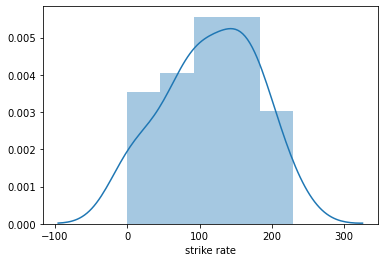

In [544]:
sns.distplot(strike_rate['strike rate'])

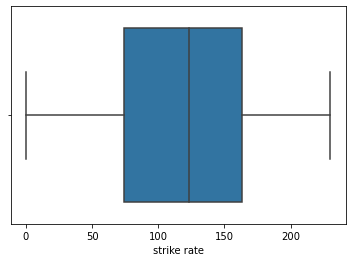

In [545]:
 sns.boxplot(strike_rate['strike rate'])

In [546]:
print("On an average strike rate of Gayle :",round(strike_rate['strike rate'].mean()))

On an average strike rate of Gayle : 116


### Confidence Interval

In [551]:
strike_rate.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
strike rate,43.0,115.754374,63.807422,0.0,73.863636,123.529412,163.397129,230.0


In [552]:
mean = strike_rate['strike rate'].mean()
sd = strike_rate['strike rate'].std()
n = len(strike_rate['strike rate'])

n

43

In [553]:
tstar = 2.064
se = sd/np.sqrt(n)
se

9.730540606412829

In [555]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the strike rate with which Gayle can score today against DC :{}".format((lcb, ucb)))

95% Confidence Interval for the strike rate with which Gayle can score today against DC :(96.0, 136.0)


- Gayle Dismissal

In [568]:
count = gayle.match_id.nunique()

In [569]:
dismiss = pd.DataFrame(gayle.groupby("match_id")["dismissal_kind"].count())

total = dismiss["dismissal_kind"].sum()

In [576]:
gayle_dismissal_percent = total/count

print("Out of last {} matches Gayle has been dismissed in {} innings".format(count , total))
print("Dismissal percentage of Gayle getting out is {}%".format(round(gayle_dismissal_percent *100)))

Out of last 43 matches Gayle has been dismissed in 39 innings
Dismissal percentage of Gayle getting out is 91.0%


So taking in consideration all the above information regarding Gayle's performance in recent years and also his current form at present we can predict Gayle to score with a strike rate of 130+ and major chances are that he would be out.